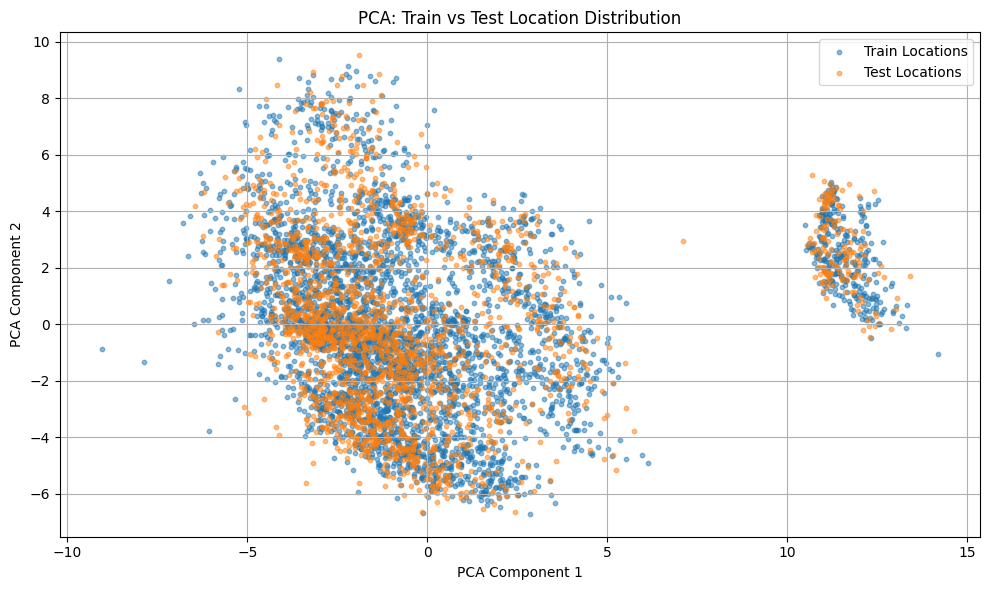

Train Place_IDs in right cluster: ['010Q650' '05EC30X' '0DPWHX8' '0GBXTHY' '0HYPV1N' '0I2XREH' '0KV6RJ1'
 '0MGEY68' '0O9R6AD' '0PP73FZ' '0TFOCOS' '0TLH9UN' '11WPGRD' '168B2T2'
 '1GZGJPN' '1LC5FAK' '1PRBF5P' '1RYCZPT' '1SC5AWD' '1TE1HKJ' '1UEYEJQ'
 '1VN0K1S' '1Y0S7TZ' '1YXF6T3' '1Z0FIHB' '1ZBVIMD' '215BUAP' '22D7H7I'
 '238N4KU' '28OSFYU' '2JZW8ZM' '2OR3E6X' '2T41T7C' '2USU80I' '2WABRKJ'
 '35YN53B' '37VXILV' '3EJ33BJ' '3H1DEPM' '3HTVI1M' '3MXSVYJ' '3V177MC'
 '3WZQJU8' '4085G7L' '426FKUG' '431JQGO' '4EVR9T8' '4IVJPF2' '4XP6UOX'
 '4ZMC9UQ' '50JFNAG' '57GIW0H' '5ETAG9S' '5I4TI4R' '5IOL334' '5KE9R9R'
 '5M7ZX94' '5QYHA81' '5SXR1G0' '5YBO7PQ' '62HOUYZ' '693EWQR' '6HXPCBH'
 '6J4AKCJ' '6KHIOQ8' '6PWJJ6D' '6SJG8N2' '6TF1KNR' '6TLEFED' '6U70TX5'
 '7DRFQCK' '7MO7ONT' '7NG0HSJ' '89GCPDD' '8D88XH3' '8HLVCJG' '8OBB7UJ'
 '8YYQSD3' '8ZGB2UV' '8ZSYE9O' '90AJCJ1' '92A8XLV' '96GO3YA' '99IA3IO'
 '9BJURTV' '9NOGUM2' '9YWJ0T2' 'A0U3M42' 'A6F2SYU' 'A8RN00Y' 'AAXHBW0'
 'AKPYCSK' 'ARTRJ6I' 'AXT8SS6' 'B3AYS4E' 'B

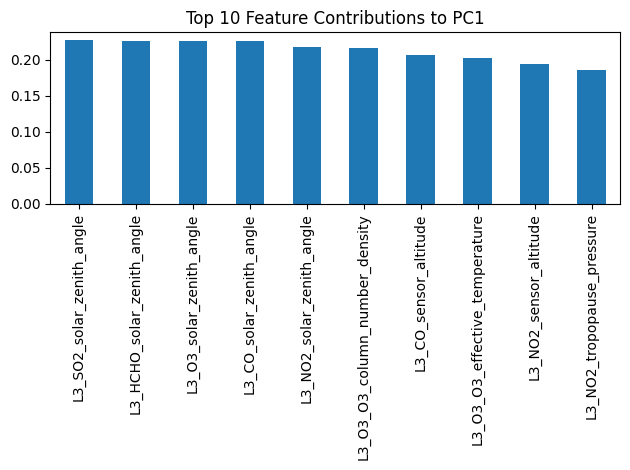

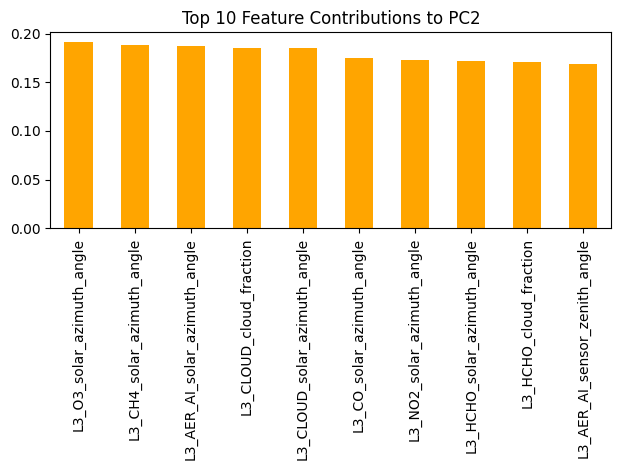

Features with significant distribution difference (p < 0.01):
L3_AER_AI_sensor_altitude: p=2.3605e-73
L3_NO2_tropopause_pressure: p=6.8254e-69
L3_CO_sensor_altitude: p=1.5582e-64
L3_O3_O3_column_number_density: p=1.8626e-63
L3_NO2_sensor_altitude: p=1.0446e-56
L3_CO_CO_column_number_density: p=3.2701e-52
L3_AER_AI_solar_zenith_angle: p=1.4252e-50
L3_CLOUD_solar_zenith_angle: p=1.2640e-48
L3_O3_solar_zenith_angle: p=5.5023e-48
L3_HCHO_solar_zenith_angle: p=4.1725e-46
L3_SO2_solar_zenith_angle: p=1.2779e-44
L3_CO_solar_zenith_angle: p=3.2438e-44
specific_humidity_2m_above_ground: p=1.0815e-43
temperature_2m_above_ground: p=1.1216e-43
L3_NO2_solar_zenith_angle: p=4.0095e-41
L3_SO2_SO2_column_number_density_amf: p=1.1685e-38
L3_CLOUD_surface_albedo: p=1.8119e-31
L3_HCHO_tropospheric_HCHO_column_number_density: p=1.8531e-31
L3_HCHO_HCHO_slant_column_number_density: p=2.0119e-26
L3_CO_H2O_column_number_density: p=1.9271e-25
u_component_of_wind_10m_above_ground: p=1.9002e-23
L3_O3_O3_effectiv

c:\Users\danie\Desktop\SPICED\air-polution\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


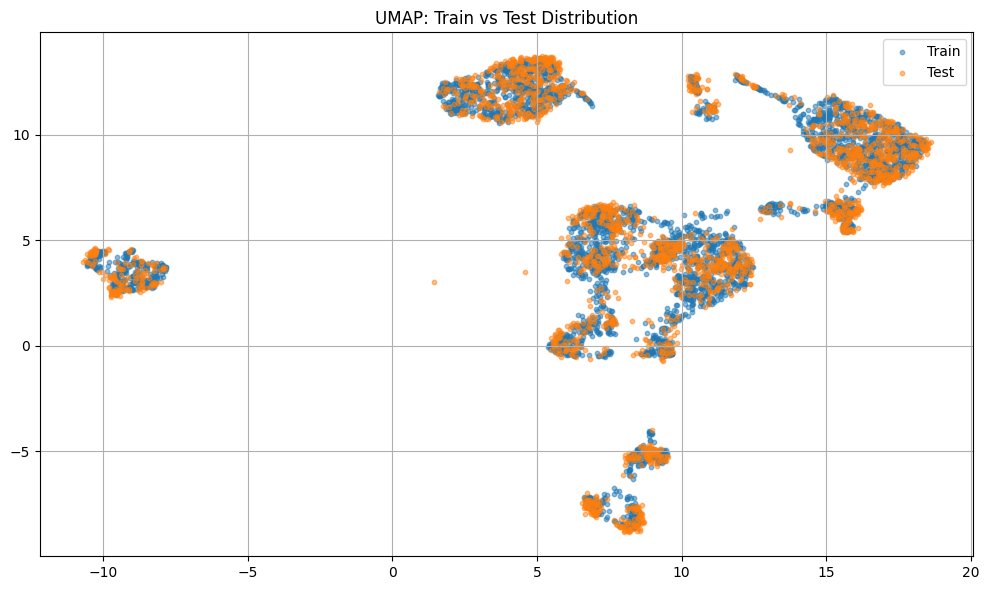

True
True
True
     L3_CO_CO_column_number_density  L3_AER_AI_sensor_altitude   
PC1                       -0.167563                   0.036086  \
PC2                       -0.090077                   0.104424   

     L3_NO2_NO2_slant_column_number_density  
PC1                               -0.142104  
PC2                               -0.012670  
3.270116198280898e-52
2.3605014952936233e-73
5.467097437427366e-13


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import ks_2samp

# Load data
train_df = pd.read_csv("C:/Users/danie/Desktop/SPICED/air-polution/Data/Train.csv")
test_df = pd.read_csv("C:/Users/danie/Desktop/SPICED/air-polution/Data/Test.csv")

# Identify columns to exclude
exclude_cols = ['Place_ID X Date', 'Date', 'Place_ID',
                'target', 'target_min', 'target_max', 'target_variance', 'target_count']

# Keep only numeric columns and exclude identifier/target columns
train_features = [col for col in train_df.columns if col not in exclude_cols and pd.api.types.is_numeric_dtype(train_df[col])]
test_features = [col for col in test_df.columns if col not in exclude_cols and pd.api.types.is_numeric_dtype(test_df[col])]

# Find columns present in both train and test
shared_features = list(set(train_features).intersection(set(test_features)))

# Drop rows with missing values and keep index
train_clean = train_df[shared_features].dropna()
test_clean = test_df[shared_features].dropna()

train_indices = train_clean.index
test_indices = test_clean.index

# Standardize
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_clean)
test_scaled = scaler.transform(test_clean)

# PCA
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)

# Plot PCA
plt.figure(figsize=(10, 6))
plt.scatter(train_pca[:, 0], train_pca[:, 1], label='Train Locations', alpha=0.5, s=10)
plt.scatter(test_pca[:, 0], test_pca[:, 1], label='Test Locations', alpha=0.5, s=10)
plt.title('PCA: Train vs Test Location Distribution')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. Identify Place_IDs in the Right-Hand PCA Cluster
train_pca_df = train_df.loc[train_indices].copy()
test_pca_df = test_df.loc[test_indices].copy()

train_pca_df['PCA1'] = train_pca[:, 0]
train_pca_df['PCA2'] = train_pca[:, 1]
test_pca_df['PCA1'] = test_pca[:, 0]
test_pca_df['PCA2'] = test_pca[:, 1]

# Filter cluster on the right
right_cluster_train = train_pca_df[train_pca_df['PCA1'] > 8]
right_cluster_test = test_pca_df[test_pca_df['PCA1'] > 8]

# Get unique Place_IDs
right_train_ids = right_cluster_train['Place_ID'].unique()
right_test_ids = right_cluster_test['Place_ID'].unique()

print("Train Place_IDs in right cluster:", right_train_ids)
print("Test Place_IDs in right cluster:", right_test_ids)

# 2. Visualize Feature Contributions to PCA
pca_components = pd.DataFrame(pca.components_, columns=shared_features, index=['PC1', 'PC2'])

# Top 10 contributors to PC1 and PC2
top_pc1 = pca_components.loc['PC1'].abs().sort_values(ascending=False).head(10)
top_pc2 = pca_components.loc['PC2'].abs().sort_values(ascending=False).head(10)

# Plot
top_pc1.plot(kind='bar', title='Top 10 Feature Contributions to PC1')
plt.tight_layout()
plt.show()

top_pc2.plot(kind='bar', title='Top 10 Feature Contributions to PC2', color='orange')
plt.tight_layout()
plt.show()

# 3. Kolmogorov–Smirnov Test: Train vs Test Feature Distributions
ks_results = {}
for col in shared_features:
    train_col = train_df[col].dropna()
    test_col = test_df[col].dropna()

    if len(train_col) > 0 and len(test_col) > 0:
        stat, p_value = ks_2samp(train_col, test_col)
        ks_results[col] = p_value

# Show features with lowest p-values (i.e., most different)
significant_diff = {k: v for k, v in ks_results.items() if v < 0.01}
print("Features with significant distribution difference (p < 0.01):")
for feature, p in sorted(significant_diff.items(), key=lambda x: x[1]):
    print(f"{feature}: p={p:.4e}")


import umap.umap_ as umap

umap_model = umap.UMAP(n_neighbors=30, min_dist=0.3, random_state=42)
train_umap = umap_model.fit_transform(train_scaled)
test_umap = umap_model.transform(test_scaled)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(train_umap[:, 0], train_umap[:, 1], label='Train', alpha=0.5, s=10)
plt.scatter(test_umap[:, 0], test_umap[:, 1], label='Test', alpha=0.5, s=10)
plt.title('UMAP: Train vs Test Distribution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print('L3_CO_CO_column_number_density' in shared_features)
print('L3_AER_AI_sensor_altitude' in shared_features)
print('L3_NO2_NO2_slant_column_number_density' in shared_features)

print(pca_components.loc[:, ['L3_CO_CO_column_number_density', 'L3_AER_AI_sensor_altitude', 'L3_NO2_NO2_slant_column_number_density']])

print(ks_results.get('L3_CO_CO_column_number_density', 'Not tested'))
print(ks_results.get('L3_AER_AI_sensor_altitude', 'Not tested'))
print(ks_results.get('L3_NO2_NO2_slant_column_number_density', 'Not tested'))
